In [26]:
import pandas as pd
equity = pd.read_csv("Equity.csv")
apple = equity[equity["Ticker"]=="AAPL US Equity"]
warnings.simplefilter('ignore', ImportWarning)

Determine whether a market is in an upward trend or downward trend at the moment is not challenging, but predicting the length of a trend is a bigger challenge.

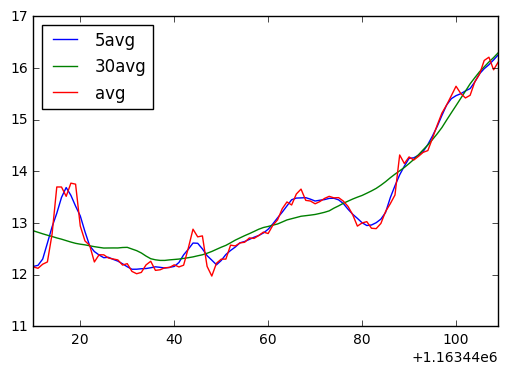

In [35]:
apple["avg"] = (apple["Close"]+apple["Open"])/2
apple["5avg"] = pd.rolling_mean(apple['avg'],window=5,center=True,min_periods=1)
apple["30avg"] = pd.rolling_mean(apple['avg'],window=30,center=True,min_periods=1)
apple["avg_diff"] = apple["30avg"]-apple["5avg"]
apple["avg_diff_norm"]=(apple["avg_diff"]-apple["avg_diff"].mean())/(apple["avg_diff"].max()-apple["avg_diff"].min())
import matplotlib.pyplot as plt
apple[['5avg','30avg',"avg"]][:100].plot()
plt.show()

Mean reversion is a known trading strategy and probably one of the easiest way to start algorithmic trading. Even though it is quite easy to calculate the 5 days and the 30 days rolling averages of a stock price these values give more insight than just the direction of the trend. Larger difference between the two mean values indicate steeper price changes, therefore we calculated the daily difference between the two rolling averages and normalized it.

In [60]:
import matplotlib.pyplot as plt
data = pd.read_csv("5 days average prediction - 506153734175476c4f62416c57734963.faa6ba63383c4086ba587abf26b85814.v1-default-1643 - Results dataset.csv",header=0)
#plt.plot(data["APPL Label 1"][:200]-data["Scored Labels"][:200], color="blue")
#plt.show()

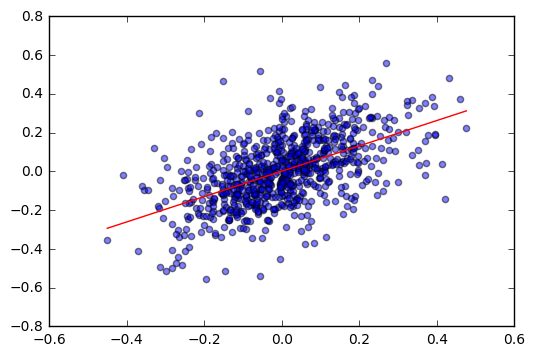

In [57]:
import numpy as np
plt.scatter(data["APPL Label 1"],data["Scored Labels"],alpha=0.5)
plt.plot(np.unique(data["APPL Label 1"]), np.poly1d(np.polyfit(data["APPL Label 1"], data["Scored Labels"], 1))(np.unique(data["APPL Label 1"])),color='r')
plt.show()

Our model predicts the rolling average difference at any particular day for the next 5 days. The larger the difference becomes the quicker the trend is and vice-versa. With this indicator traders can get an quickly insight whether the market faces a flash crash or a longer term. The plot above shows the prediction for the next day against the actual difference. Clearly our model captures the relationship.

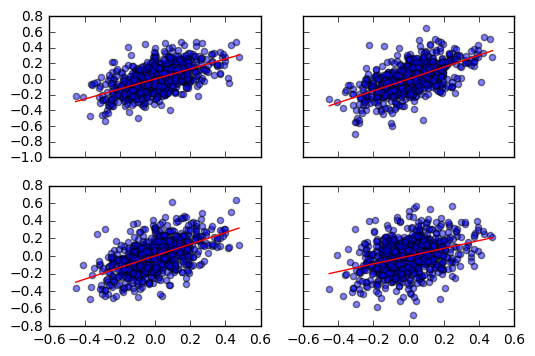

In [58]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.scatter(data["APPL Label 2"],data["Scored Labels (2)"],alpha=0.5)
ax1.plot(np.unique(data["APPL Label 2"]), np.poly1d(np.polyfit(data["APPL Label 2"], data["Scored Labels (2)"], 1))(np.unique(data["APPL Label 2"])),color='r')
ax2.scatter(data["APPL Label 3"],data["Scored Labels (3)"],alpha=0.5)
ax2.plot(np.unique(data["APPL Label 3"]), np.poly1d(np.polyfit(data["APPL Label 3"], data["Scored Labels (3)"], 1))(np.unique(data["APPL Label 3"])),color='r')
ax3.scatter(data["APPL Label 4"],data["Scored Labels (2) (2)"],alpha=0.5)
ax3.plot(np.unique(data["APPL Label 4"]), np.poly1d(np.polyfit(data["APPL Label 4"], data["Scored Labels (2) (2)"], 1))(np.unique(data["APPL Label 4"])),color='r')
ax4.scatter(data["APPL Label 5"],data["Scored Labels (3) (2)"],alpha=0.5)
ax4.plot(np.unique(data["APPL Label 5"]), np.poly1d(np.polyfit(data["APPL Label 5"], data["Scored Labels (3) (2)"], 1))(np.unique(data["APPL Label 5"])),color='r')
plt.show()